In [1]:
# Import some packages
import xarray
import matplotlib
import numpy
import cartopy
%matplotlib inline

# Import a few functions from particular packages
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import AutoMinorLocator
from cartopy.util import add_cyclic_point
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import warnings
warnings.filterwarnings("ignore")

# Palaeoclimate Modelling Intercomparison Project (PMIP)

## This notebook is created to replicate the Figure 2 & Figure 3 in Williams et al (2020): https://cp.copernicus.org/articles/16/1429/2020/

## Here we compare the near surface temperature (tas) and precipitation (pr) in the mid-Holocene and lig127k simulation runs with piControl experiment in the HadGEM3-CG31-LL model. 

In [3]:
#Set path names for input files: machine dependent.
# These are for UCL's JupyterHub/. Look at end of notebook for other options...


# Unadjusted interglacial simulations (to be used for Annual mean variables)
f1='~/geog0121_shared_space/PMIP_GeoMIP_summary_files/HadGEM3-GC31-LL_midHolocene.cvdp_data.2250-2349.nc' 
f2='~/geog0121_shared_space/PMIP_GeoMIP_summary_files//HadGEM3-GC31-LL_lig127k.cvdp_data.1850-2049.nc'

# Adjusted interglacial simulations (to be used for everything)
f3='~/geog0121_shared_space/PMIP_GeoMIP_summary_files/HadGEM3-GC31-LL_midHolocene-cal-adj.cvdp_data.2250-2349.nc'
f4='~/geog0121_shared_space/PMIP_GeoMIP_summary_files//HadGEM3-GC31-LL_lig127k-cal-adj.cvdp_data.1850-2049.nc'

# Preindustrial control simulation (has current calendar, so no need for calendar adjustment)
f5='~/geog0121_shared_space/PMIP_GeoMIP_summary_files//HadGEM3-GC31-LL_piControl.cvdp_data.2250-2349.nc'

In [6]:
# Load in the files
load_data_1=xarray.open_dataset(f1,decode_times=False) #annual mh data
load_data_2=xarray.open_dataset(f2,decode_times=False) #annual lig data
load_data_3=xarray.open_dataset(f3,decode_times=False) #cal-adj mh data
load_data_4=xarray.open_dataset(f4,decode_times=False) #cal-adj lig data
load_data_5=xarray.open_dataset(f5,decode_times=False) #pi data

## tas plot:

In [7]:
#load the Annual mean variables from unadjusted files 
tas_ann_mh=load_data_1.tas_spatialmean_ann
tas_ann_lig=load_data_2.tas_spatialmean_ann
tas_ann_pi=load_data_5.tas_spatialmean_ann


#load the seasonal mean variables from adjusted files 
tas_jja_mh=load_data_3.tas_spatialmean_jja
tas_jja_lig=load_data_4.tas_spatialmean_jja
tas_jja_pi=load_data_5.tas_spatialmean_jja
tas_djf_mh=load_data_3.tas_spatialmean_djf
tas_djf_lig=load_data_4.tas_spatialmean_djf
tas_djf_pi=load_data_5.tas_spatialmean_djf

In [8]:
print(tas_jja_mh)

<xarray.DataArray 'tas_spatialmean_jja' (lat: 144, lon: 192)>
array([[-57.2568  , -57.23169 , -57.207493, ..., -57.289745, -57.278088,
        -57.26379 ],
       [-55.272568, -55.34604 , -55.42162 , ..., -55.00775 , -55.102108,
        -55.192184],
       [-54.19603 , -54.317158, -54.426025, ..., -53.71639 , -53.89631 ,
        -54.056904],
       ...,
       [ -1.070945,  -1.069778,  -1.070369, ...,  -1.072772,  -1.0725  ,
         -1.071144],
       [ -1.040383,  -1.040857,  -1.041482, ...,  -1.03896 ,  -1.039609,
         -1.040318],
       [ -1.005286,  -1.004999,  -1.005183, ...,  -1.005507,  -1.005364,
         -1.005419]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * lon      (lon) float64 0.9375 2.812 4.688 6.562 ... 353.4 355.3 357.2 359.1
Attributes:
    paleo_calendar_adjustment:  monthly values adjusted for the appropriate p...
    coordinates:                height
    history:                    2019-06-20T2

Text(0.5, 0, '2m air temperature oC')

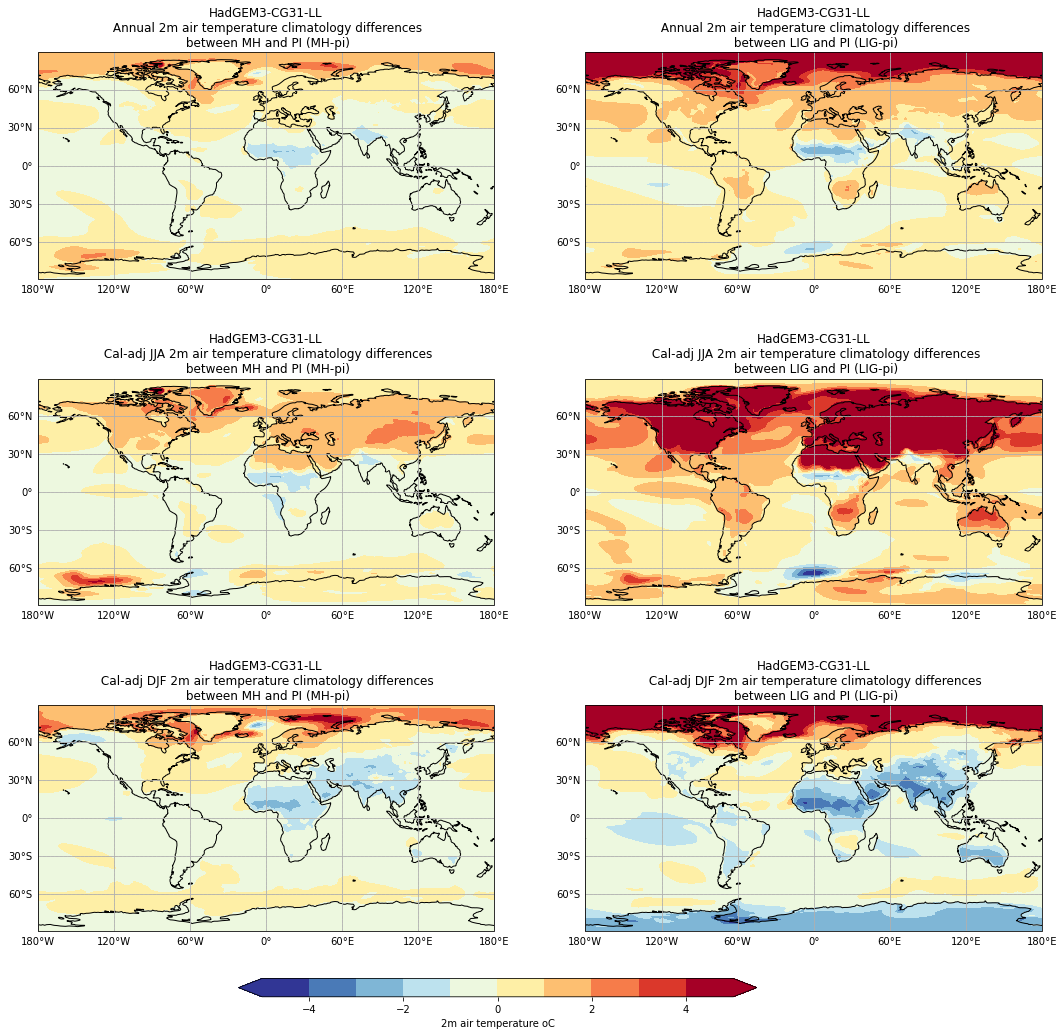

In [21]:
#load and compute the data for plotting
#mh-pi
lat_1 = load_data_1.lat
lon_1 = load_data_1.lon
tas_ann_diff_1 = tas_ann_mh - tas_ann_pi
tas_ann_diff_1,lon_1 = add_cyclic_point(tas_ann_diff_1, coord=lon_1) #to remove the white line along the Greenwich Meridian

lat_2 = load_data_1.lat
lon_2 = load_data_1.lon
tas_jja_diff_1 = tas_jja_mh - tas_jja_pi
tas_jja_diff_1,lon_2 = add_cyclic_point(tas_jja_diff_1, coord=lon_2)

lat_3 = load_data_1.lat
lon_3 = load_data_1.lon
tas_djf_diff_1 = tas_djf_mh - tas_djf_pi
tas_djf_diff_1,lon_3 = add_cyclic_point(tas_djf_diff_1, coord=lon_3)

#lig-pi
lat_4 = load_data_2.lat
lon_4 = load_data_2.lon
tas_ann_diff_2 = tas_ann_lig - tas_ann_pi
tas_ann_diff_2,lon_4 = add_cyclic_point(tas_ann_diff_2, coord=lon_4)

lat_5 = load_data_2.lat
lon_5 = load_data_2.lon
tas_jja_diff_2 = tas_jja_lig - tas_jja_pi
tas_jja_diff_2,lon_5 = add_cyclic_point(tas_jja_diff_2, coord=lon_5)

lat_6 = load_data_2.lat
lon_6 = load_data_2.lon
tas_djf_diff_2 = tas_djf_lig - tas_djf_pi
tas_djf_diff_2,lon_6 = add_cyclic_point(tas_djf_diff_2, coord=lon_6)

#plotting:
fig=matplotlib.pyplot.figure(figsize=(18,17))

ax1=fig.add_subplot(321,projection=cartopy.crs.PlateCarree(central_longitude=0.0, globe=None))
ax2=fig.add_subplot(323,projection=cartopy.crs.PlateCarree(central_longitude=0.0, globe=None))
ax3=fig.add_subplot(325,projection=cartopy.crs.PlateCarree(central_longitude=0.0, globe=None))
ax4=fig.add_subplot(322,projection=cartopy.crs.PlateCarree(central_longitude=0.0, globe=None))
ax5=fig.add_subplot(324,projection=cartopy.crs.PlateCarree(central_longitude=0.0, globe=None))
ax6=fig.add_subplot(326,projection=cartopy.crs.PlateCarree(central_longitude=0.0, globe=None))

ax=[ax1,ax2,ax3,ax4,ax5,ax6]
lat=[lat_1,lat_2,lat_3,lat_4,lat_5,lat_6]
lon=[lon_1,lon_2,lon_3,lon_4,lon_5,lon_6]
diff=[tas_ann_diff_1,tas_jja_diff_1,tas_djf_diff_1,
      tas_ann_diff_2,tas_jja_diff_2,tas_djf_diff_2]
time_1=['Annual', 'Cal-adj JJA', 'Cal-adj DJF', 'Annual', 'Cal-adj JJA', 'Cal-adj DJF']
time_2=['MH','MH','MH','LIG','LIG','LIG']

transform=cartopy.crs.PlateCarree()
bounds = numpy.linspace(-5,5,11)
norm = matplotlib.colors.BoundaryNorm(boundaries=bounds, ncolors=256)

Fig=[]
for i in range (0,6):
    ax[i].coastlines()
    ax[i].gridlines()
    gl = ax[i].gridlines(crs=cartopy.crs.PlateCarree(),alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.xlabels_bottom=True
    gl.ylabels_left = True
    gl.ylabels_right=False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER

    Fig.append(ax[i].contourf(lon[i], lat[i], diff[i], levels=bounds, transform=transform, cmap='RdYlBu_r',norm=norm, extend='both'))
    ax[i].set(title='HadGEM3-CG31-LL\n %s 2m air temperature climatology differences\n between %s and PI (%s-pi)'%(time_1[i],time_2[i],time_2[i]))

# set the colorbars 
cbar_ax = fig.add_axes([0.28, 0.09, 0.40, 0.015]) 
#The numbers in the square brackets of add_axes refer to [left, bottom, width, height]
cbar=matplotlib.pyplot.colorbar(Fig[5],cax=cbar_ax,orientation='horizontal')
cbar.ax.set_xlabel('2m air temperature oC')


### This plot is roughly the same as Fig. 2 in Williams et al (2020)
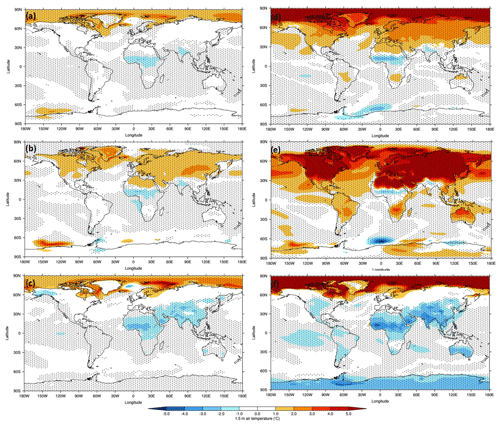

Figure 2 Calendar-adjusted 1.5 m air temperature climatology differences, HadGEM3 midHolocene and lig127k production runs versus HadGEM3 piControl production run: (a–c) midHolocene−piControl; (d–f) lig127k−piControl. (a, d) Annual; (b, e) Northern Hemisphere summer (JJA); (c, f) Northern Hemisphere winter (DJF). Stippling shows statistical significance (as calculated by Student's t test) at the 99 % level.

## pr plot: (the same plot as above, but for precipitation)

In [17]:
print(load_data_3.pr_spatialmean_jja)

<xarray.DataArray 'pr_spatialmean_jja' (lat: 144, lon: 192)>
dask.array<open_dataset-17a1bcf312287158d6def39e8641517epr_spatialmean_jja, shape=(144, 192), dtype=float32, chunksize=(144, 192), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * lon      (lon) float64 0.9375 2.812 4.688 6.562 ... 353.4 355.3 357.2 359.1
Attributes:
    paleo_calendar_adjustment:  monthly values adjusted for the appropriate p...
    history:                    2019-06-20T23:25:57Z altered by CMOR: replace...
    original_name:              mo: (stash: m01s05i216, lbproc: 128)
    units:                      mm/day
    comment:                    includes both liquid and solid phases
    long_name:                  pr mean (JJA)
    standard_name:              precipitation_flux


In [22]:
#load the variables:
pr_ann_mh=load_data_1.pr_spatialmean_ann
pr_ann_lig=load_data_2.pr_spatialmean_ann
pr_ann_pi=load_data_5.pr_spatialmean_ann


pr_jja_mh=load_data_3.pr_spatialmean_jja
pr_jja_lig=load_data_4.pr_spatialmean_jja
pr_jja_pi=load_data_5.pr_spatialmean_jja


pr_djf_mh=load_data_3.pr_spatialmean_djf
pr_djf_lig=load_data_4.pr_spatialmean_djf
pr_djf_pi=load_data_5.pr_spatialmean_djf

Text(0.5, 0, 'rainfall mm/day')

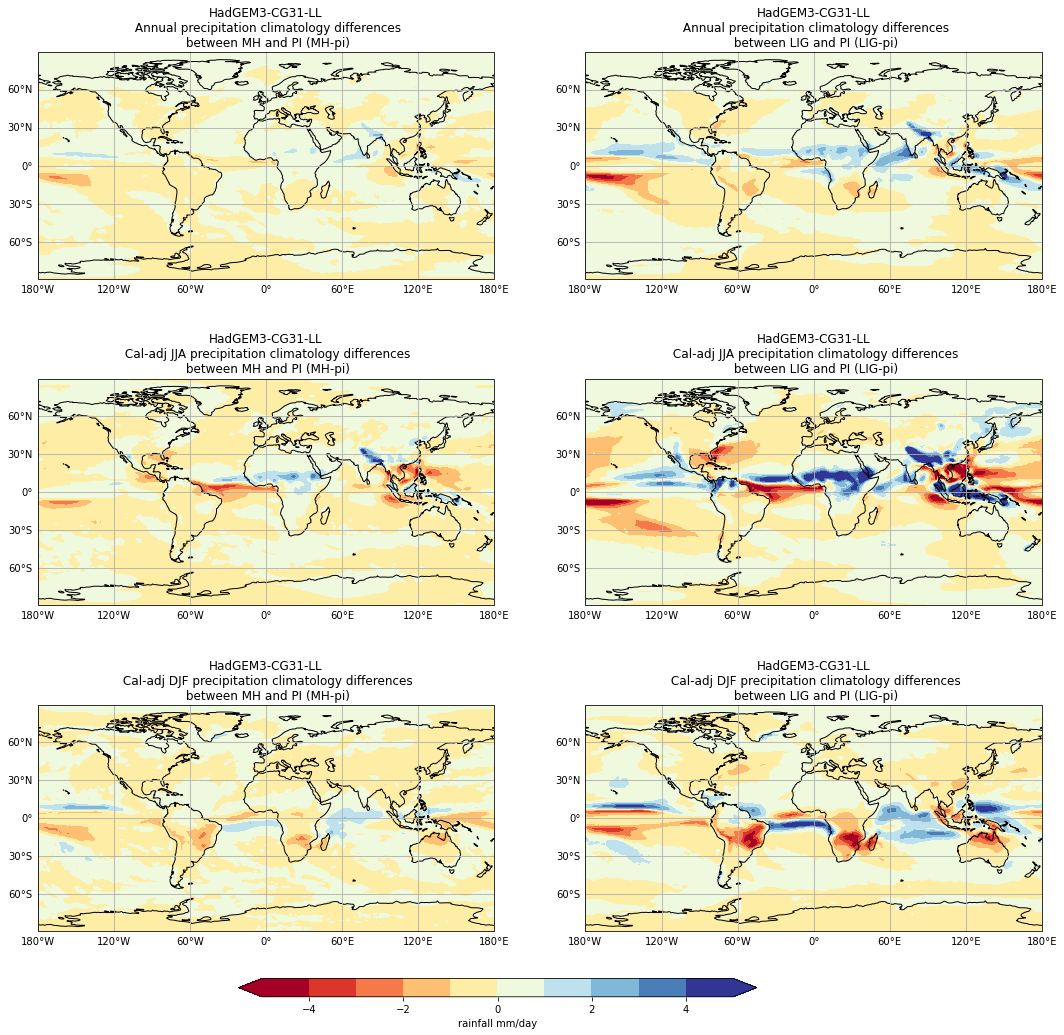

In [24]:
#load and compute the data for plotting
#mh-pi
lat_1 = load_data_1.lat
lon_1 = load_data_1.lon
pr_ann_diff_1 = pr_ann_mh - pr_ann_pi
pr_ann_diff_1,lon_1 = add_cyclic_point(pr_ann_diff_1, coord=lon_1)

lat_2 = load_data_1.lat
lon_2 = load_data_1.lon
pr_jja_diff_1 = pr_jja_mh - pr_jja_pi
pr_jja_diff_1,lon_2 = add_cyclic_point(pr_jja_diff_1, coord=lon_2)

lat_3 = load_data_1.lat
lon_3 = load_data_1.lon
pr_djf_diff_1 = pr_djf_mh - pr_djf_pi
pr_djf_diff_1,lon_3 = add_cyclic_point(pr_djf_diff_1, coord=lon_3)

#lig-pi
lat_4 = load_data_2.lat
lon_4 = load_data_2.lon
pr_ann_diff_2 = pr_ann_lig - pr_ann_pi
pr_ann_diff_2,lon_4 = add_cyclic_point(pr_ann_diff_2, coord=lon_4)

lat_5 = load_data_2.lat
lon_5 = load_data_2.lon
pr_jja_diff_2 = pr_jja_lig - pr_jja_pi
pr_jja_diff_2,lon_5 = add_cyclic_point(pr_jja_diff_2, coord=lon_5)

lat_6 = load_data_2.lat
lon_6 = load_data_2.lon
pr_djf_diff_2 = pr_djf_lig - pr_djf_pi
pr_djf_diff_2,lon_6 = add_cyclic_point(pr_djf_diff_2, coord=lon_6)

#plotting:
fig=matplotlib.pyplot.figure(figsize=(18,17))

ax1=fig.add_subplot(321,projection=cartopy.crs.PlateCarree(central_longitude=0.0, globe=None))
ax2=fig.add_subplot(323,projection=cartopy.crs.PlateCarree(central_longitude=0.0, globe=None))
ax3=fig.add_subplot(325,projection=cartopy.crs.PlateCarree(central_longitude=0.0, globe=None))
ax4=fig.add_subplot(322,projection=cartopy.crs.PlateCarree(central_longitude=0.0, globe=None))
ax5=fig.add_subplot(324,projection=cartopy.crs.PlateCarree(central_longitude=0.0, globe=None))
ax6=fig.add_subplot(326,projection=cartopy.crs.PlateCarree(central_longitude=0.0, globe=None))

ax=[ax1,ax2,ax3,ax4,ax5,ax6]
lat=[lat_1,lat_2,lat_3,lat_4,lat_5,lat_6]
lon=[lon_1,lon_2,lon_3,lon_4,lon_5,lon_6]
diff=[pr_ann_diff_1,pr_jja_diff_1,pr_djf_diff_1,
      pr_ann_diff_2,pr_jja_diff_2,pr_djf_diff_2]
time_1=['Annual', 'Cal-adj JJA', 'Cal-adj DJF', 'Annual', 'Cal-adj JJA', 'Cal-adj DJF']
time_2=['MH','MH','MH','LIG','LIG','LIG']

transform=cartopy.crs.PlateCarree()
bounds = numpy.linspace(-5,5,11)
norm = matplotlib.colors.BoundaryNorm(boundaries=bounds, ncolors=256)

Fig=[]
for i in range (0,6):
    ax[i].coastlines()
    ax[i].gridlines()
    gl = ax[i].gridlines(crs=cartopy.crs.PlateCarree(),alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.xlabels_bottom=True
    gl.ylabels_left = True
    gl.ylabels_right=False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER

    Fig.append(ax[i].contourf(lon[i], lat[i], diff[i], levels=bounds, transform=transform, cmap='RdYlBu',norm=norm, extend='both'))
    ax[i].set(title='HadGEM3-CG31-LL\n %s precipitation climatology differences\n between %s and PI (%s-pi)'%(time_1[i],time_2[i],time_2[i]))

# set the colorbars 
cbar_ax = fig.add_axes([0.28, 0.09, 0.40, 0.015]) 
#The numbers in the square brackets of add_axes refer to [left, bottom, width, height]
cbar=matplotlib.pyplot.colorbar(Fig[5],cax=cbar_ax,orientation='horizontal')
cbar.ax.set_xlabel('rainfall mm/day')


### This plot is roughly the same as Fig. 3 in Williams et al (2020)
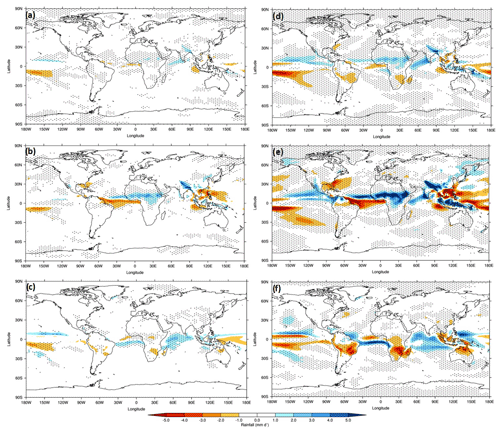
Figure 3 Same as Fig. 2 but for daily surface rainfall differences.

## Machine dependent locations

In [5]:
# FOR YOUR OWN MACHINE

# Unadjusted interglacial simulations (to be used for Annual mean variables)
filename_1='HadGEM3-GC31-LL_midHolocene.cvdp_data.2250-2349.nc'
filename_2='HadGEM3-GC31-LL_lig127k.cvdp_data.1850-2049.nc'
f1='Data/%s'%filename_1
f2='Data/%s'%filename_2

# Adjusted interglacial simulations (to be used for everything)
filename_3='HadGEM3-GC31-LL_midHolocene-cal-adj.cvdp_data.2250-2349.nc'
filename_4='HadGEM3-GC31-LL_lig127k-cal-adj.cvdp_data.1850-2049.nc'
f3='Data/%s'%filename_3
f4='Data/%s'%filename_4

# Preindustrial control simulation (has current calendar, so no need for calendar adjustment)
filename_5='HadGEM3-GC31-LL_piControl.cvdp_data.2250-2349.nc'
f5='Data/%s'%filename_5

#Download the files if they are not already here
import os
import urllib

if not os.path.isfile(f1):
    print('Downloading %s' %(f1))
    !mkdir Data
    urllib.request.urlretrieve("http://www2.geog.ucl.ac.uk/~p2f-v/PMIPVarData/cvdp_data/%s"%filename_1,f1)

if not os.path.isfile(f2):
    print('Downloading %s' %(f2))
    urllib.request.urlretrieve("http://www2.geog.ucl.ac.uk/~p2f-v/PMIPVarData/cvdp_data/%s"%filename_2,f2)

if not os.path.isfile(f3):
    print('Downloading %s' %(f3))
    urllib.request.urlretrieve("http://www2.geog.ucl.ac.uk/~p2f-v/PMIPVarData/cvdp_data/%s"%filename_3,f3)
    
if not os.path.isfile(f4):
    print('Downloading %s' %(f4))
    urllib.request.urlretrieve("http://www2.geog.ucl.ac.uk/~p2f-v/PMIPVarData/cvdp_data/%s"%filename_4,f4)

if not os.path.isfile(f5):
    print('Downloading %s' %(f5))
    urllib.request.urlretrieve("http://www2.geog.ucl.ac.uk/~p2f-v/PMIPVarData/cvdp_data/%s"%filename_5,f5)


mkdir: cannot create directory ‘Data’: File exists


HTTPError: HTTP Error 403: Forbidden